# Data Wrangling and Analysis: @WeRateDogs Tweets

# Introduction

The goal of this project is to wrangle @WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

** Project Details **

* Data wrangling
    * Gathering data
    * Assessing data
    * Cleaning data
    
    
* Storing, analyzing, and visualizing the wrangled data

* Reporting on
    1. data wrangling efforts
    2. data analyses and visualizations

# Environment Setup

In [2]:
# import needed libraries
import pandas as pd # for creating and manipulating dataframes
import numpy as np # for scientific computing
import requests # for HTTP requests
import tweepy # for accessing the Twitter API
import json # for encoding/decoding JSON objects
import matplotlib.pyplot as plt # for 2D plotting
from textblob import TextBlob # for processing textual data using common natural language processing (NLP) tasks
from timeit import default_timer as timer # for setting up a timer
import os
import re

# for displaying the plots inline
%matplotlib inline

# Data Wrangling
## 1. Gathering Data
Gather data from multiple sources, including loading files, programmatically downloading files, and accessing data from APIs.
### 1.1 Load @WeRateDogs twitter archive file
Load the **@WeRateDogs** tweets archive (2356 tweets). This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

In [3]:
# Load data in a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

# Display the first 5 tweets in the dataframe
display(archive.head(5))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2 Extracting a file from a server
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and is downloaded programmatically using the Requests library.

In [4]:
# download the file image_predictions.tsv which hosted on Udacity's servers
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [5]:
# Check if the request was successful, and print some info
print("Status-code: {}".format(r.status_code))
print("Content-type: {}".format(r.headers['content-type']))
print("Encoding: {}".format(r.encoding))

Status-code: 200
Content-type: text/tab-separated-values; charset=utf-8
Encoding: utf-8


In [6]:
# Save the extracted file in a new file (image-predictions.tsv)
with open(os.path.join('', url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [7]:
# Load data in a dataframe
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

# Display the first 5 tweets in the dataframe
display(predictions.head(5))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3 Extract data from twitter API
Retweet count and favorite (like) count are two of the notable column omissions from the Twitter archive. Fortunately, this additional data can be gathered, along with any additional interesting data by using tweepy library. The tweet IDs in the @WeRateDogs Twitter archive were used to query the Twitter API for each tweet's JSON data, and store each tweet's entire set of JSON data in a file called tweet_json.txt.

Query the Twitter API for each tweet's JSON data using the tweet IDs in the @WeRateDogs Twitter archive:

In [ ]:
# Twitter App access keys
CONSUMER_KEY = 'VzI0fT52DlveqUujI3palCpJg'
CONSUMER_SECRET = 'PZIqatK1ru0CwP5j005cUfyLnK9ln4L3yQ7rcqj39IGabUZJmy'
ACCESS_TOKEN = '993463135628603392-bKy2yimaawwVTnRHQrsx4larIRVb6vF'
ACCESS_SECRET = 'RfD11bGE7julkqpEFuWFQ1wR0fKBilTNQ4hb2M8cUuPjk'

# Twitter API setup
def twitter_setup():
    """
    a function for setting up the Twitter's API with the access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [ ]:
# Setting up Twitter API
api = twitter_setup()

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Store each tweet's entire set of JSON data in a file called tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# Read tweet_json.txt file line by line into a pandas dataframe with tweet ID, retweet count, and favorite count.
columns = ['id', 'favorite_count', 'retweet_count']

data = []

with open('tweet_json.txt', 'r') as file: 
    # Read in JSON line and convert to dict
    json_line = file.readline()
    # Read line by line into a dataframe
    while json_line:
        line = json.loads(json_line)
        row = dict((k, line[k]) for k in columns)
        data.append(row)
        # Read a JSON line and convert it to a dictionary
        json_line = file.readline()

# Convert the dictionary to a dataframe
tweets = pd.DataFrame.from_dict(data)
display(tweets.head(5))

,favorite_count,id,retweet_count
0,38015,892420643555336193,8315
1,32639,892177421306343426,6142
2,24565,891815181378084864,4067
3,41364,891689557279858688,8459
4,39552,891327558926688256,9157


## 2. Assessing Data
* Assess data visually and programmatically using pandas.
* Distinguish between dirty data (content or “quality” issues) and messy data (structural or “tidiness” issues)
* Identify data quality issues and categorize them using metrics:
    validity, accuracy, completeness, consistency, and uniformity

### 2.1 Visual Assessment
Visually assess each piece of gathered data.

In [9]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [11]:
tweets.head(3)

,favorite_count,id,retweet_count
0,38015,892420643555336193,8315
1,32639,892177421306343426,6142
2,24565,891815181378084864,4067


### 2.2 Programmatic Assessment

Investigate data shape, types, and size:

In [12]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 3 columns):
favorite_count    2189 non-null int64
id                2189 non-null int64
retweet_count     2189 non-null int64
dtypes: int64(3)
memory usage: 51.4 KB


There are 2075 rows in the image predictions dataframe and 2356 rows in the archive dataframe.

Check for duplicates:

In [15]:
sum(archive.tweet_id.duplicated())

0

In [16]:
sum(predictions.tweet_id.duplicated())

0

In [17]:
sum(tweets.id.duplicated())

0

In [18]:
sum(predictions.jpg_url.duplicated())

66

The name column has many entries which do not look like names. The most frequent entry in name column is "a", which is not a name.

In [19]:
archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
an             7
Bailey         7
Toby           7
Daisy          7
Bella          6
Jack           6
Leo            6
Milo           6
Stanley        6
Dave           6
Koda           6
Jax            6
Oscar          6
Scout          6
Rusty          6
Phil           5
            ... 
Deacon         1
Brian          1
Dallas         1
Godzilla       1
Pubert         1
this           1
Brandy         1
Kulet          1
Rueben         1
Ebby           1
Jiminus        1
Lillie         1
Rilo           1
Raphael        1
Rolf           1
Nigel          1
Ralph          1
Nida           1
O              1
Dutch          1
Yukon          1
Shooter        1
Jackie         1
Nugget         1
Eriq           1
Hector         1
Shnuggles      1
Beya          

There are 181 tweets with a retweeted_status_id that need to be removed.

In [20]:
archive.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

There are a lot of columns with incorrect data types. For example, the timestamp column type is object not a datetime object.

In [21]:
type(archive.timestamp)

pandas.core.series.Series

In [22]:
type(archive.text)

pandas.core.series.Series

### 2.3 Summary
**Quality Issues**
1. Some columns have inaccurate data types. For example, the timestamp and retweeted_status_timestamp columns are objects, although they should be datetime objects. Some other columns should be integers/strings instead of floats.
2. Remove retweets, i.e. tweets that are not original or are responses.
3. Remove tweets that are not ratings, i.e. tweets without images.
4. The name column has many entries which do not look like names. The most frequent entry in name column is "a", which is not a name.
5. There are unnecessary columns in the dataframes like source, img_num, expanded_urls, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, and in_reply_to_user_id. The cleaned dataframe can be condensed.
6. There are 2075 rows in the image predictions dataframe and 2356 rows in the archive dataframe. 
7. Remove tweets in predictions where all probabilities of p_dog are False, i.e. where the algorithm is certain the image is not a dog.
8. The columns p1, p2, p3 in predictions are inconsistent in their capitalization.

**Tidiness Issues**
1. The columns doggo, floofer, pupper and puppo represent the dog stages, and should be collapsed into one column named dog_stage.
2.  All three dataframes should be merged into one clean dataframe since they all hold information about the same entity; tweet.
3. Sort the timestamp column.

## 3. Cleaning Data
Cleaning all the data to fix the quality and tidiness issues identified in the Assessing Data step:
* Identify each step of the data cleaning process (defining, coding, and testing)
* Clean data using Python and pandas
* Test cleaning code visually and programmatically using Python

In [24]:
# Prepare copies of original dataset to be cleaned
cleaned_archive = archive.copy()
cleaned_predictions = predictions.copy()
cleaned_tweets = tweets.copy()

_________________________

**Define:**
Change some of the columns data types in the cleaned_archive dataframe.

**Code:**

In [25]:
# Fix archive data types
cleaned_archive['tweet_id'] = cleaned_archive['tweet_id'].astype(str)
cleaned_archive['in_reply_to_status_id'] = cleaned_archive['in_reply_to_status_id'].astype(str)
cleaned_archive['in_reply_to_user_id'] = cleaned_archive['in_reply_to_user_id'].astype(str)
cleaned_archive['timestamp'] = pd.to_datetime(cleaned_archive.timestamp)
cleaned_archive['source'] = cleaned_archive['source'].astype(str)
cleaned_archive['retweeted_status_id'] = cleaned_archive['retweeted_status_id'].astype(str)
cleaned_archive['retweeted_status_user_id'] = cleaned_archive['retweeted_status_user_id'].astype(str)
cleaned_archive['retweeted_status_timestamp'] = pd.to_datetime(cleaned_archive.retweeted_status_timestamp)
cleaned_archive['name'] = cleaned_archive['name'].astype(str)

# Fix predictions data types
cleaned_predictions['tweet_id'] = cleaned_predictions['tweet_id'].astype(str)
cleaned_predictions['p1'] = cleaned_predictions['p1'].astype(str)
cleaned_predictions['p2'] = cleaned_predictions['p2'].astype(str)
cleaned_predictions['p3'] = cleaned_predictions['p3'].astype(str)

# Fix tweets data types
cleaned_tweets['id'] = cleaned_tweets['id'].astype(str)
cleaned_tweets['favorite_count'] = cleaned_tweets['favorite_count'].astype(int)
cleaned_tweets['retweet_count'] = cleaned_tweets['retweet_count'].astype(int)

**Test:**

In [26]:
print('archive \n {} \n'.format(cleaned_archive.dtypes))
print('predictions \n {} \n'.format(cleaned_predictions.dtypes))
print('tweets \n {} \n'.format(cleaned_tweets.dtypes))

archive 
 tweet_id                              object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object 

predictions 
 tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           ob

_________________________

**Define:**
Remove retweets, i.e. tweets that are not original.
or responses and delete their respective columns

**Code:**

In [27]:
# Find and remove retweets by checking the retweet_count (represents the number of time the source tweet was retweeted)

# Remove retweets
retweets = cleaned_archive[cleaned_archive["retweeted_status_id"]!="nan"]["tweet_id"].index
cleaned_archive.drop(retweets, inplace=True)

# Remove responses
responses = cleaned_archive[cleaned_archive["in_reply_to_status_id"]!="nan"]["tweet_id"].index
cleaned_archive.drop(responses, inplace=True)

# Remove their respective columns
cleaned_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

**Test:**

In [28]:
cleaned_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

_________________________

**Define:**
Remove tweets that are not ratings, i.e. tweets without images.

**Code:**

In [29]:
# Find the image predictions that have no images
cleaned_predictions = cleaned_predictions[pd.notnull(cleaned_predictions['jpg_url'])]

**Test:**

In [30]:
len(cleaned_predictions[pd.isnull(cleaned_predictions['jpg_url'])])

0

_________________________

**Define:**
The name column has many entries which do not look like names.

**Code:**

In [31]:
def extract_name(row):
    # Split the tweet text into words
    words = row['text'].split()
    
    name = 'None'
    
    # Extract name after certain expressions
    if 'named' in words:
        # Get the next word after it
        name = words[words.index('named') + 1]
    elif row['text'].startswith('This is ') and words[row['text'].index('This is') + 2] != 'a' and words[row['text'].index('This is') + 2] != 'an':
        name = words[row['text'].index('This is') + 2]
    elif row['text'].startswith('Say hello to'):
        name = words[row['text'].index('Say hello to') + 3]
    elif 'Meet' in words:
        name = words[words.index('Meet') + 1]
            
    # Save name and remove any periods
    row['name'] = name.replace('.','')
    
    # Return row whether updated or name
    return row
    
cleaned_archive = cleaned_archive.apply(extract_name, axis=1)

**Test:**

In [32]:
cleaned_archive.name.value_counts()

None        665
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Lola          8
Winston       8
Daisy         7
Bailey        6
Toby          6
Bo            6
Jax           6
Stanley       6
Bella         6
Koda          6
Oscar         6
Rusty         5
Chester       5
Milo          5
the           5
Scout         5
Bentley       5
Buddy         5
Louis         5
Leo           5
Reggie        4
Jerry         4
           ... 
Lassie        1
Mairi         1
Kawhi         1
Nugget        1
Jackie        1
Samsom        1
Jiminus       1
Wylie         1
Lance         1
Blue          1
Arlen         1
Tedrick       1
Florence      1
Steve         1
Kulet         1
Hercules      1
Ebby          1
Kreggory      1
Leroi         1
Rilo          1
Raphael       1
Rolf          1
Nigel         1
Ralph         1
Nida          1
Rueben        1
Yukon         1
Johm          1
Shooter       1
Jockson       1
Name: name, Length: 966,

_________________________

**Define:**
Remove the unused/unneeded columns; source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id.

**Code:**

In [33]:
# retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are already dropped.

# Drop unnecessary columns from archive dataframe
cleaned_archive = cleaned_archive.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis=1)

# Drop unnecessary columns from predictions dataframe
cleaned_predictions = cleaned_predictions.drop(['img_num'], axis=1)

**Test:**

In [34]:
cleaned_archive.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [35]:
cleaned_predictions.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

_________________________

**Define:**
There are missing data in the image predictions dataframe. It only has 2075 rows instead of 2356. Hence, only keep the rows in the archive that have image predictions.

**Code:**

In [36]:
# Only keep rows in predictions that have IDs in archive 
dataset = pd.merge(cleaned_archive, cleaned_predictions, on=['tweet_id'], how='left')

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
dtypes: datetime64[ns](1

**Test:**

In [38]:
# Check if tweet_id existing in predictions but not in archive is not in the merged dataframe
tweet_ids = cleaned_predictions.tweet_id

for tweet_id in tweet_ids:
    # Test if ID is also in archive
    if tweet_id not in cleaned_archive.tweet_id.values:
        # Check that it also isn't in new dataframe
        if tweet_id in dataset.tweet_id.values:
            print('The tweet_ID {} should not be in the cleaned merged dataframe!'.format(tweet_id))

_________________________

**Define:**
Remove tweets in predictions where all probabilities of p_dog are False, i.e. where the algorithm is certain the image is not a dog.

**Code:**

In [39]:
# Find tweet_id of images that are not of dogs
remove = dataset[(dataset["p1_dog"] == False) &
                     (dataset["p2_dog"] == False) &
                     (dataset["p3_dog"] == False)]["tweet_id"].index

# Remove tweets where all probabilities of p_dog are False
dataset.drop(remove, inplace=True)

**Test:**

In [40]:
# Check there are no tweets where all probabilities of p_dog are False
assert len(dataset[(dataset["p1_dog"] == False) &
          (dataset["p2_dog"] == False) &
          (dataset["p3_dog"] == False)]) == 0
print("Tweets of images that are not dogs are successfully deleted.")

Tweets of images that are not dogs are successfully deleted.


_________________________

**Define:**
Make the values of columns p1, p2, p3 in predictions all lowercase.

**Code:**

In [41]:
dataset['p1'] = dataset['p1'].str.lower()
dataset['p2'] = dataset['p2'].str.lower()
dataset['p3'] = dataset['p3'].str.lower()

**Test:**

In [42]:
dataset.p1.unique()
dataset.p2.unique()
dataset.p3.unique()

array(['papillon', 'kelpie', 'spatula', 'german_short-haired_pointer',
       'indian_elephant', 'ice_lolly', 'pembroke',
       'chesapeake_bay_retriever', 'chihuahua', 'chow', 'muzzle',
       'basenji', 'staffordshire_bullterrier', 'redbone', 'saluki',
       'labrador_retriever', 'english_setter', 'malamute', 'bull_mastiff',
       'weimaraner', 'beagle', 'can_opener', 'dandie_dinmont',
       'boston_bull', 'siamese_cat', 'bernese_mountain_dog', 'kuvasz', nan,
       'eskimo_dog', 'norfolk_terrier', 'brabancon_griffon',
       'norwegian_elkhound', 'newfoundland', 'dingo',
       'flat-coated_retriever', 'cardigan', 'cocker_spaniel',
       'golden_retriever', 'koala', 'persian_cat', 'clumber', 'bath_towel',
       'american_staffordshire_terrier', 'ibizan_hound', 'appenzeller',
       'toy_terrier', 'bathtub', 'tibetan_mastiff',
       'greater_swiss_mountain_dog', 'vizsla', 'great_pyrenees',
       'toy_poodle', 'standard_poodle', 'dalmatian', 'pomeranian',
       'bloodhound', 

_________________________

**Define:**
Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'.

**Code:**

In [43]:
# Initialize all dog stages to be 'None'
dataset['dog_stage'] = 'None'

# Define a list to hold all possible dog_stages
dog_stages = []

for index, row in dataset.iterrows():
    text = row.text.lower()
    if ' puppo ' in text or row.puppo != 'None':
        dog_stages.append('puppo')
    if ' pupper ' in text or row.pupper != 'None':
        dog_stages.append('pupper')
    if ' floofer ' in text or row.floofer != 'None':
        dog_stages.append('floofer')
    if ' doggo ' in text or row.doggo != 'None':
        dog_stages.append('doggo')
    
    # Save all the found dog stages in the new column dog_stage
    if dog_stages:
        dataset.set_value(index,'dog_stage', ','.join(dog_stages))
    dog_stages = []

# Drop the melted columns
dataset = dataset.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test:**

In [44]:
dataset['dog_stage'].value_counts()

None             1502
pupper            186
doggo              63
puppo              22
floofer             9
pupper,doggo        8
puppo,doggo         1
floofer,doggo       1
Name: dog_stage, dtype: int64

In [45]:
dataset.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

_________________________

**Define:**
Merge the dataframes into one cleaned dataframe.

**Code:**

In [46]:
# Rename the column id to tweet_id to match the other two dataframes
cleaned_tweets.rename(columns = {'id':'tweet_id'}, inplace = True)

# Merge 3 dataframes into a new dataframe using inner join
cleaned_dataset = pd.merge(dataset, cleaned_tweets, on='tweet_id', how='inner')
cleaned_dataset.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage',
       'favorite_count', 'retweet_count'],
      dtype='object')

**Test:**

In [47]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 1668
Data columns (total 19 columns):
tweet_id              1669 non-null object
timestamp             1669 non-null datetime64[ns]
text                  1669 non-null object
rating_numerator      1669 non-null int64
rating_denominator    1669 non-null int64
name                  1669 non-null object
jpg_url               1558 non-null object
p1                    1558 non-null object
p1_conf               1558 non-null float64
p1_dog                1558 non-null object
p2                    1558 non-null object
p2_conf               1558 non-null float64
p2_dog                1558 non-null object
p3                    1558 non-null object
p3_conf               1558 non-null float64
p3_dog                1558 non-null object
dog_stage             1669 non-null object
favorite_count        1669 non-null int64
retweet_count         1669 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(11)
memory us

_________________________

**Define:**
Sort the timestamp column in the cleaned dataset. 

**Code:**

In [48]:
cleaned_dataset = cleaned_dataset.sort_values('timestamp')

**Test:**

In [49]:
cleaned_dataset.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,favorite_count,retweet_count
1668,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,None,2535,502
1667,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7,10,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,None,126,47
1666,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9,10,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,None,123,43
1665,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,None,292,139
1664,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,None,106,41


_________________________

Store the final cleaned dataframe cleaned_archive into a CSV file:

In [50]:
# Store cleaned data in the file twitter_archive_master.csv
cleaned_dataset.to_csv('twitter_archive_master.csv')

# Analysing and Visualising Data
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

**Basic stats:**

* The @WeRateDogs account got between 12 and 61,934 retweets for its original tweets.
* The @WeRateDogs account got between 78 and 140,343 favorites for its original tweets.
* The neural network performed the best on the 1st iteration with a mean prediciton of 0.6.
* The average rating numerator given was 11.
* The least rating numerator given was 0, and the most was 144.

In [51]:
data = cleaned_dataset.copy()
data.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1669.000000,1669.000000,1558.000000,1558.000000,1.558000e+03,1669.000000,1669.000000
mean,11.366687,10.384062,0.603394,0.138270,6.170810e-02,9194.261234,2745.373277
std,6.463770,5.338023,0.266377,0.101770,5.200953e-02,12994.490020,4602.036062
min,0.000000,2.000000,0.044333,0.000023,2.160900e-07,78.000000,12.000000
25%,10.000000,10.000000,0.375696,0.055716,1.605313e-02,1996.000000,597.000000
50%,11.000000,10.000000,0.605331,0.121816,5.059690e-02,4026.000000,1356.000000
75%,12.000000,10.000000,0.848619,0.199528,9.490405e-02,11768.000000,3166.000000
max,144.000000,120.000000,0.999956,0.467678,2.734190e-01,140343.000000,61934.000000


_________________________

The @WeRateDogs account tweet's length on average is 120 characters.

In [52]:
# Calculate the number of charachters for each tweets and save it in a new column 'length'
data['length']  = np.array([len(tweet) for tweet in data.text])

# Find the mean of tweet length
mean = np.mean(data['length'])

print("The tweets average lenght: {} characters.".format(int(mean)))

The tweets average lenght: 120 characters.


In [53]:
# Find the tweet with the most likes and most retweets
like_max = np.max(data['favorite_count'])
rt_max  = np.max(data['retweet_count'])

like = data[data.favorite_count == like_max].index[0]
rt  = data[data.retweet_count == rt_max].index[0]

# Most Likes
print("The most favorited tweet is: \n{}".format(data['text'][like]))
print("No. of favorites: {}\n".format(like_max))

# Most RTs
print("The most retweeted tweet is: \n{}".format(data['text'][rt]))
print("No. of retweets: {}".format(rt_max))

The most favorited tweet is: 
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
No. of favorites: 140343

The most retweeted tweet is: 
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
No. of retweets: 61934


In [54]:
# Find the tweet with the least likes and most retweets
like_min = np.min(data['favorite_count'])
rt_min  = np.min(data['retweet_count'])

like = data[data.favorite_count == like_min].index[0]
rt  = data[data.retweet_count == rt_min].index[0]

# Most Likes
print("The least favorited tweet is: \n{}".format(data['text'][like]))
print("No. of favorites: {}\n".format(like_min))

# Most RTs
print("The least retweeted tweet is: \n{}".format(data['text'][rt]))
print("No. of retweets: {}".format(rt_min))

The least favorited tweet is: 
Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq
No. of favorites: 78

The least retweeted tweet is: 
Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq
No. of retweets: 12


_________________________

**Visualizations:**

Compare the number of retweets and favorites that the @WeRateDogs account has over time.

In [55]:
# Create a time series from the data
likes = pd.Series(data=data['favorite_count'].values, index=data['timestamp'])
retweets = pd.Series(data=data['retweet_count'].values, index=data['timestamp'])

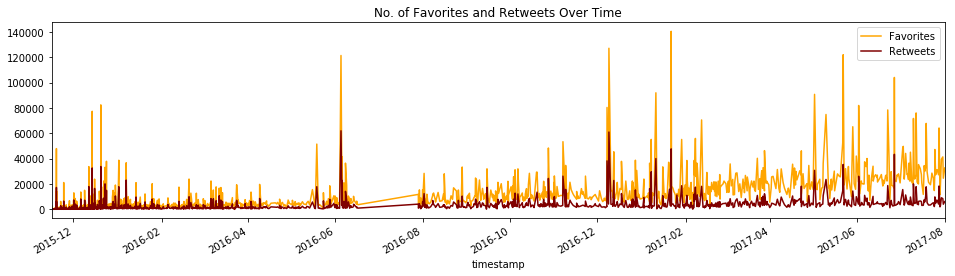

In [56]:
# Create a plot to compare the likes and retweets along time
likes.plot(figsize=(16,4), label='Favorites', color='orange', legend=True)
retweets.plot(figsize=(16,4), label='Retweets', color='maroon', legend=True);
plt.title('No. of Favorites and Retweets Over Time')
plt.show()

* We can see from the plot that in general, @WeRateDogs tweets get more favorites than retweets.
* In June 2016, the account got its highest number of favorites (140,343 favorites), and its highest number of retweets (61,934 retweets).
* In March 2016, the account got its lowest number of favorites (78 favorites), and its lowest number of retweets (12 retweets).
* In general, there's a pattern where the favoriting and retweeting behaviour are similar in their rises and falls, where the favorite_count is usally double the retweet_count. Except in March 2017 going forward, the favorites counts started to exceed the retweets counts by far.

In [57]:
# The tweets with the lowest favorite count
data.loc[data['favorite_count'] == 78]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,favorite_count,retweet_count,length
1653,666102155909144576,2015-11-16 03:55:04,Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,english_setter,0.298617,True,newfoundland,0.149842,True,borzoi,0.133649,True,None,78,12,128


In [58]:
# The tweets with the highest favorite count
data.loc[data['favorite_count'] == 140343]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,favorite_count,retweet_count,length
294,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13,10,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,puppo,140343,47683,111


In [59]:
# The tweets with the lowest retweet count
data.loc[data['retweet_count'] == 12]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,favorite_count,retweet_count,length
1653,666102155909144576,2015-11-16 03:55:04,Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,english_setter,0.298617,True,newfoundland,0.149842,True,borzoi,0.133649,True,None,78,12,128


In [60]:
# The tweets with the highest retweet count
data.loc[data['retweet_count'] == 61934]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,favorite_count,retweet_count,length
656,739238157791694849,2016-06-04 23:31:25,Here's a doggo blowing bubbles. It's downright...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/73923...,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True,doggo,121294,61934,138


_________________________

In [61]:
# Find the top dog stage
data['dog_stage'].value_counts()

None             1406
pupper            175
doggo              54
puppo              18
pupper,doggo        7
floofer             7
puppo,doggo         1
floofer,doggo       1
Name: dog_stage, dtype: int64

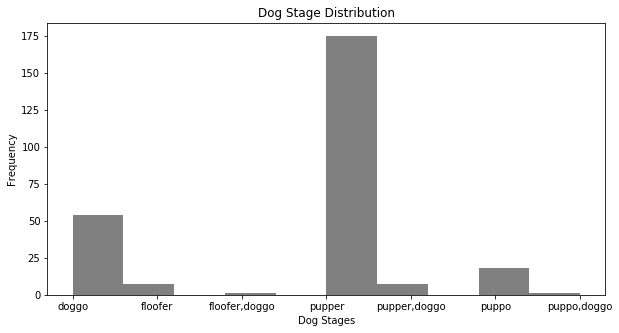

In [62]:
# Create plots to show the dog_stage distribution
plt.figure(figsize=(10,5))
plt.hist(data.dog_stage.loc[data['dog_stage'] != 'None'], color='gray')
plt.title('Dog Stage Distribution')
plt.xlabel('Dog Stages')
plt.ylabel('Frequency')
plt.show()

Pupper is the most popular dog stage with a total of 175, and floofer is the least popular. However, most tweets have no dog stage specified and were excluded.

_________________________

In [63]:
# Find what the algorithm has found as the top dog breed
data['p1'].describe()

count                 1558
unique                 210
top       golden_retriever
freq                   129
Name: p1, dtype: object

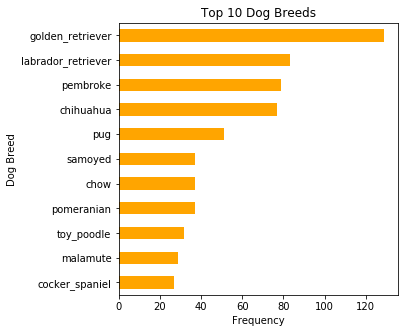

In [64]:
# Plot the top 10 predicted dog breeds
dogs = data['p1'] != 'not_dog'
plt.figure(figsize=(5,5))
breeds = data[dogs].p1.value_counts()[10::-1]
breeds.plot.barh(color='orange')
plt.title('Top 10 Dog Breeds')
plt.xlabel('Frequency')
plt.ylabel('Dog Breed')
plt.show()

The golden retriever is the most common dog breed found with a total of 129.

_________________________

**Basic sentiment analysis:**

In [65]:
def clean_tweet(tweet):
    '''
    a function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    a function to classify a tweet's polarity using the library textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [66]:
# Add the analysis result as a new column to the dataframe
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['text'] ])

# Display the updated dataframe with the sentimate analysis results for each tweet
display(data.head(5))

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,favorite_count,retweet_count,length,SA
1668,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True,...,0.156665,True,shetland_sheepdog,0.061428,True,None,2535,502,131,0
1667,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7,10,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,...,0.074192,True,rhodesian_ridgeback,0.072010,True,None,126,47,139,-1
1666,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9,10,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True,...,0.138584,True,bloodhound,0.116197,True,None,123,43,130,1
1665,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True,...,0.360687,True,miniature_pinscher,0.222752,True,None,292,139,137,0
1664,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,...,0.243682,True,doberman,0.154629,True,None,106,41,120,0


In [67]:
# Classify tweets
positives = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] > 0]
neutrals = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 0]
negatives = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] < 0]

positives_percent = len(positives) * 100 / len(data['text'])
neutrals_percent = len(neutrals) * 100 / len(data['text'])
negatives_percent = len(negatives) * 100 / len(data['text'])

# Calculate the percentages of each classification
print("Percentage of positive tweets: {}%".format(positives_percent))
print("Percentage of neutral tweets: {}%".format(neutrals_percent))
print("Percentage de negative tweets: {}%".format(negatives_percent))

Percentage of positive tweets: 51.46794487717196%
Percentage of neutral tweets: 27.02216896345117%
Percentage de negative tweets: 21.509886159376872%


**Visualizations:**

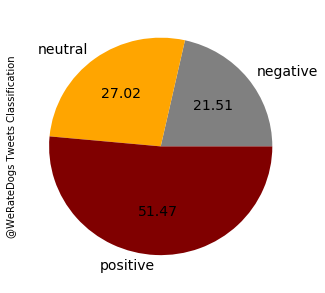

In [68]:
# Construct a dictionary holding all the percentages
classification = {'positive':positives_percent, 'neutral':neutrals_percent, 'negative':negatives_percent}

# Create a time series from the classification data
series = pd.Series(classification, name='@WeRateDogs Tweets Classification')

# Visualize the result in a pie chart
series.plot.pie(fontsize=14, autopct='%.2f', figsize=(5, 5), colors=['gray', 'orange', 'maroon']);
plt.show();

In [71]:
data['length'].describe()

count    1669.000000
mean      120.675255
std        27.073995
min        36.000000
25%       103.000000
50%       130.000000
75%       139.000000
max       167.000000
Name: length, dtype: float64

It doesn't come as a surprise that most @WeRateDogs tweets are positive since the whole account is created to express dogs love and appreciation.